In [2]:
import numpy as np

In [3]:
import tensorflow as tf

2022-12-18 13:20:22.061355: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-18 13:20:22.219219: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-12-18 13:20:22.934488: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2022-12-18 13:20:22.934600: W tensorflow/

In [4]:
tf.__version__

'2.11.0'

In [5]:
from tensorflow import keras

In [6]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img

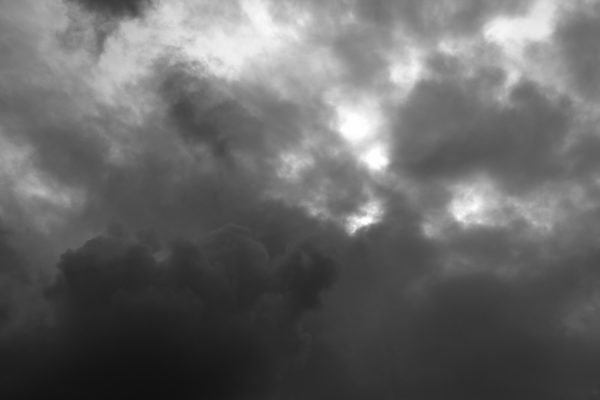

In [7]:
path = 'data_weather/train/cloudy'
name = 'cloudy1.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

In [8]:
img = load_img(fullname, target_size=(299, 299))

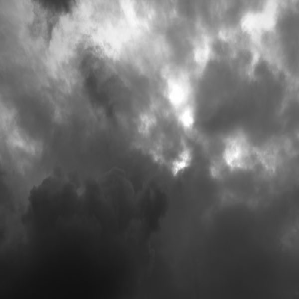

In [9]:
img

In [10]:
x = np.array(img)
x.shape

(299, 299, 3)

In [11]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [12]:
model = Xception(weights='imagenet', input_shape=(299, 299, 3))

2022-12-18 13:20:52.348548: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-18 13:20:52.413799: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2022-12-18 13:20:52.413836: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1934] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2022-12-18 13:20:52.414360: I tensorflow/core/platform/cpu_feature_guard.c

In [13]:
X = np.array([x])

In [14]:
X.shape

(1, 299, 299, 3)

In [15]:
X = preprocess_input(X)

In [16]:
pred = model.predict(X)

1/1 [==============================] - 1s 845ms/step


In [17]:
decode_predictions(pred)

[[('n03837869', 'obelisk', 0.057299636),
  ('n03888257', 'parachute', 0.05291038),
  ('n03028079', 'church', 0.043559536),
  ('n09288635', 'geyser', 0.041594163),
  ('n02814860', 'beacon', 0.03543654)]]

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [19]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory(
    'data_weather/train',
    target_size=(150, 150),
    batch_size=32
)

Found 674 images belonging to 5 classes.


In [20]:
train_ds.class_indices

{'.ipynb_checkpoints': 0, 'cloudy': 1, 'rain': 2, 'shine': 3, 'sunrise': 4}

In [21]:
X, y = next(train_ds)

In [22]:
y[:5]

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.]], dtype=float32)

In [23]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    'data_weather/val',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 226 images belonging to 5 classes.


In [24]:
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

base_model.trainable = False



inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(5)(vectors)

model = keras.Model(inputs, outputs)

In [25]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [26]:
history = model.fit(train_ds, epochs=5, validation_data=val_ds)

Epoch 1/5
22/22 [==============================] - 29s 1s/step - loss: 0.5437 - accuracy: 0.8145 - val_loss: 0.2876 - val_accuracy: 0.9381
Epoch 2/5
22/22 [==============================] - 26s 1s/step - loss: 0.1439 - accuracy: 0.9510 - val_loss: 0.3207 - val_accuracy: 0.8938
Epoch 3/5
22/22 [==============================] - 26s 1s/step - loss: 0.0819 - accuracy: 0.9748 - val_loss: 0.2558 - val_accuracy: 0.9292
Epoch 4/5
22/22 [==============================] - 26s 1s/step - loss: 0.0547 - accuracy: 0.9881 - val_loss: 0.2786 - val_accuracy: 0.9204
Epoch 5/5
22/22 [==============================] - 26s 1s/step - loss: 0.0424 - accuracy: 0.9911 - val_loss: 0.3035 - val_accuracy: 0.9159


### Learning rate 

In [28]:
def make_model(learning_rate=0.01):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(5)(vectors)
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model


In [29]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)

    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history

    print()
    print()

0.0001
Epoch 1/10
22/22 [==============================] - 29s 1s/step - loss: 1.4708 - accuracy: 0.3353 - val_loss: 1.4164 - val_accuracy: 0.4292
Epoch 2/10
22/22 [==============================] - 26s 1s/step - loss: 1.2335 - accuracy: 0.5282 - val_loss: 1.2616 - val_accuracy: 0.4735
Epoch 3/10
22/22 [==============================] - 26s 1s/step - loss: 1.0840 - accuracy: 0.6246 - val_loss: 1.1448 - val_accuracy: 0.5177
Epoch 4/10
22/22 [==============================] - 26s 1s/step - loss: 0.9726 - accuracy: 0.7047 - val_loss: 1.0490 - val_accuracy: 0.6239
Epoch 5/10
22/22 [==============================] - 26s 1s/step - loss: 0.8819 - accuracy: 0.7789 - val_loss: 0.9775 - val_accuracy: 0.6903
Epoch 6/10
22/22 [==============================] - 27s 1s/step - loss: 0.8129 - accuracy: 0.8145 - val_loss: 0.9150 - val_accuracy: 0.6991
Epoch 7/10
22/22 [==============================] - 26s 1s/step - loss: 0.7520 - accuracy: 0.8368 - val_loss: 0.8611 - val_accuracy: 0.7124
Epoch 8/10
22

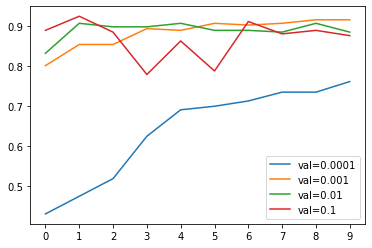

In [37]:
for lr, hist in scores.items():
    #plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))
#plt.ylim(0.8, 0.999)
plt.xticks(np.arange(10))
plt.legend()

In [38]:
learning_rate = 0.01

### Checkpointing

In [39]:
model.save_weights('w_model_v1.h5', save_format='h5')

In [40]:
chechpoint = keras.callbacks.ModelCheckpoint(
    'w_xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [41]:
learning_rate = 0.01

model = make_model(learning_rate=learning_rate)

history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=[chechpoint]
)

Epoch 1/10
22/22 [==============================] - 30s 1s/step - loss: 0.6241 - accuracy: 0.7582 - val_loss: 0.5118 - val_accuracy: 0.8319
Epoch 2/10
22/22 [==============================] - 27s 1s/step - loss: 0.1469 - accuracy: 0.9436 - val_loss: 0.2686 - val_accuracy: 0.9248
Epoch 3/10
22/22 [==============================] - 27s 1s/step - loss: 0.1365 - accuracy: 0.9555 - val_loss: 0.2594 - val_accuracy: 0.9204
Epoch 4/10
22/22 [==============================] - 27s 1s/step - loss: 0.1164 - accuracy: 0.9570 - val_loss: 0.3353 - val_accuracy: 0.9204
Epoch 5/10
22/22 [==============================] - 27s 1s/step - loss: 0.0661 - accuracy: 0.9792 - val_loss: 0.3841 - val_accuracy: 0.9159
Epoch 6/10
22/22 [==============================] - 27s 1s/step - loss: 0.0529 - accuracy: 0.9852 - val_loss: 0.3396 - val_accuracy: 0.8938
Epoch 7/10
22/22 [==============================] - 27s 1s/step - loss: 0.0353 - accuracy: 0.9926 - val_loss: 0.3351 - val_accuracy: 0.9027
Epoch 8/10
22/22 [==

### Adding more layers

In [42]:
def make_model(learning_rate=0.01, size_inner=100):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    
    outputs = keras.layers.Dense(5)(inner)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [43]:
learning_rate = 0.01

scores = {}

for size in [10, 100, 1000]:
    print(size)

    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history

    print()
    print()

10
Epoch 1/10
22/22 [==============================] - 29s 1s/step - loss: 0.6363 - accuracy: 0.7611 - val_loss: 0.5293 - val_accuracy: 0.8097
Epoch 2/10
22/22 [==============================] - 26s 1s/step - loss: 0.1688 - accuracy: 0.9421 - val_loss: 0.3040 - val_accuracy: 0.8982
Epoch 3/10
22/22 [==============================] - 26s 1s/step - loss: 0.0841 - accuracy: 0.9733 - val_loss: 0.3669 - val_accuracy: 0.8407
Epoch 4/10
22/22 [==============================] - 26s 1s/step - loss: 0.0483 - accuracy: 0.9881 - val_loss: 0.3039 - val_accuracy: 0.8850
Epoch 5/10
22/22 [==============================] - 26s 1s/step - loss: 0.0366 - accuracy: 0.9941 - val_loss: 0.3130 - val_accuracy: 0.9027
Epoch 6/10
22/22 [==============================] - 26s 1s/step - loss: 0.0304 - accuracy: 0.9941 - val_loss: 0.3156 - val_accuracy: 0.9071
Epoch 7/10
22/22 [==============================] - 26s 1s/step - loss: 0.0255 - accuracy: 0.9941 - val_loss: 0.3602 - val_accuracy: 0.8894
Epoch 8/10
22/22 

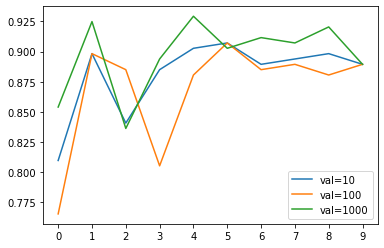

In [44]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))

plt.xticks(np.arange(10))
#plt.yticks([0.78, 0.80, 0.82, 0.825, 0.83])
plt.legend()

In [ ]:
size = 1000

### Regularization and dropout

In [45]:
def make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(5)(drop)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [46]:
learning_rate = 0.01
size = 1000

scores = {}

for droprate in [0.2, 0.5]:
    print(droprate)

    model = make_model(
        learning_rate=learning_rate,
        size_inner=size,
        droprate=droprate
    )

    history = model.fit(train_ds, epochs=20, validation_data=val_ds)
    scores[droprate] = history.history

    print()
    print()

0.2
Epoch 1/20
22/22 [==============================] - 29s 1s/step - loss: 2.6518 - accuracy: 0.7404 - val_loss: 1.2010 - val_accuracy: 0.7832
Epoch 2/20
22/22 [==============================] - 26s 1s/step - loss: 0.2837 - accuracy: 0.9228 - val_loss: 0.5636 - val_accuracy: 0.8540
Epoch 3/20
22/22 [==============================] - 26s 1s/step - loss: 0.1964 - accuracy: 0.9451 - val_loss: 0.5106 - val_accuracy: 0.8850
Epoch 4/20
22/22 [==============================] - 26s 1s/step - loss: 0.0767 - accuracy: 0.9703 - val_loss: 0.3048 - val_accuracy: 0.9027
Epoch 5/20
22/22 [==============================] - 27s 1s/step - loss: 0.0429 - accuracy: 0.9866 - val_loss: 0.3541 - val_accuracy: 0.8982
Epoch 6/20
22/22 [==============================] - 27s 1s/step - loss: 0.0290 - accuracy: 0.9896 - val_loss: 0.3637 - val_accuracy: 0.9071
Epoch 7/20
22/22 [==============================] - 26s 1s/step - loss: 0.0323 - accuracy: 0.9911 - val_loss: 0.3659 - val_accuracy: 0.8850
Epoch 8/20
22/22

In [57]:
scores

{0.0: {'loss': [0.3579968214035034,
   0.07246410101652145,
   0.04666496813297272,
   0.029257746413350105,
   0.018813759088516235,
   0.013042212463915348,
   0.008836633525788784,
   0.007138451095670462,
   0.005373712163418531,
   0.00426959665492177,
   0.0035662129521369934,
   0.0029246557969599962,
   0.002542378380894661,
   0.0021579782478511333,
   0.0018886796897277236,
   0.0017002312233671546,
   0.0014657399151474237,
   0.0013106269761919975,
   0.0011806875700131059,
   0.0010606379946693778,
   0.0009626390528865159,
   0.0008740447228774428,
   0.0008008212898857892,
   0.0007393427658826113,
   0.0006814104272052646,
   0.0006395236123353243,
   0.0005857032374478877,
   0.0005422313115559518,
   0.0005010262248106301,
   0.00046454870607703924],
  'accuracy': [0.8938888907432556,
   0.980555534362793,
   0.9872221946716309,
   0.992222249507904,
   0.9977777600288391,
   0.9994444251060486,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
 

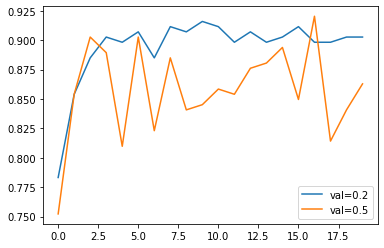

In [47]:
for droprate, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % droprate))

#plt.ylim(0.78, 0.86)
plt.legend()

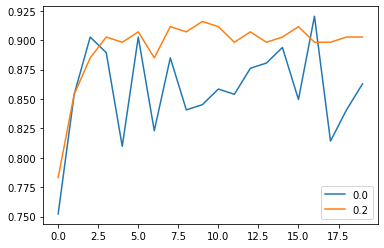

In [49]:
hist = scores[0.5]
plt.plot(hist['val_accuracy'], label=0.0)

hist = scores[0.2]
plt.plot(hist['val_accuracy'], label=0.2)

plt.legend()
#plt.plot(hist['accuracy'], label=('val=%s' % droprate))